In [ ]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import preprocessing

# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=9, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/sample_data/CPU_INFO.csv", delimiter=",")
print(dataset.shape)
# split into input (X) and output (Y) variables
X = dataset[:,0:9]
Y = dataset[:,9]

# normaliza input and output values
normalized_X = preprocessing.normalize(X)
#normalized_Y = preprocessing.normalize(Y)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [100, 1000, 10000]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(normalized_X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

(26680, 10)
Best: 0.976011 using {'batch_size': 10000, 'epochs': 10}
0.023989 (0.033925) with: {'batch_size': 100, 'epochs': 10}
0.023989 (0.033925) with: {'batch_size': 100, 'epochs': 50}
0.175644 (0.248398) with: {'batch_size': 100, 'epochs': 100}
0.309344 (0.437479) with: {'batch_size': 1000, 'epochs': 10}
0.023989 (0.033925) with: {'batch_size': 1000, 'epochs': 50}
0.023989 (0.033925) with: {'batch_size': 1000, 'epochs': 100}
0.976011 (0.033925) with: {'batch_size': 10000, 'epochs': 10}
0.023989 (0.033925) with: {'batch_size': 10000, 'epochs': 50}
0.023989 (0.033925) with: {'batch_size': 10000, 'epochs': 100}


In [ ]:
# Use scikit-learn to grid search the optimizer
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import preprocessing

# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=9, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/sample_data/CPU_INFO.csv", delimiter=",")
print(dataset.shape)
# split into input (X) and output (Y) variables
X = dataset[:,0:9]
Y = dataset[:,9]

# normaliza input and output values
normalized_X = preprocessing.normalize(X)
#normalized_Y = preprocessing.normalize(Y)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(normalized_X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

(26680, 10)
Best: 0.976011 using {'optimizer': 'Adam'}
0.309344 (0.437479) with: {'optimizer': 'SGD'}
0.309344 (0.437479) with: {'optimizer': 'RMSprop'}
0.642678 (0.455391) with: {'optimizer': 'Adagrad'}
0.357322 (0.455391) with: {'optimizer': 'Adadelta'}
0.976011 (0.033925) with: {'optimizer': 'Adam'}
0.309344 (0.437479) with: {'optimizer': 'Adamax'}
0.690656 (0.437479) with: {'optimizer': 'Nadam'}


In [ ]:
# Use scikit-learn to grid search the learning rate
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=9, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	optimizer = Adam(lr=learn_rate)
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/sample_data/CPU_INFO.csv", delimiter=",")
print(dataset.shape)
# split into input (X) and output (Y) variables
X = dataset[:,0:9]
Y = dataset[:,9]

# normaliza input and output values
normalized_X = preprocessing.normalize(X)
#normalized_Y = preprocessing.normalize(Y)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(normalized_X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

(26680, 10)
Best: 0.976011 using {'learn_rate': 0.001}
0.976011 (0.033925) with: {'learn_rate': 0.001}
0.309344 (0.437479) with: {'learn_rate': 0.01}
0.023989 (0.033925) with: {'learn_rate': 0.1}
0.309344 (0.437479) with: {'learn_rate': 0.2}
0.642678 (0.455391) with: {'learn_rate': 0.3}


In [ ]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=9, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
	# Compile model
	opt = Adam(lr=0.001)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/sample_data/CPU_INFO.csv", delimiter=",")
print(dataset.shape)
# split into input (X) and output (Y) variables
X = dataset[:,0:9]
Y = dataset[:,9]

# normaliza input and output values
normalized_X = preprocessing.normalize(X)
#normalized_Y = preprocessing.normalize(Y)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
#init_mode = ['glorot_uniform', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(normalized_X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

(26680, 10)
Best: 0.976011 using {'init_mode': 'he_uniform'}
0.023989 (0.033925) with: {'init_mode': 'uniform'}
0.642678 (0.455391) with: {'init_mode': 'lecun_uniform'}
0.309344 (0.437479) with: {'init_mode': 'normal'}
0.309344 (0.437479) with: {'init_mode': 'zero'}
0.642678 (0.455391) with: {'init_mode': 'glorot_normal'}
0.642678 (0.455391) with: {'init_mode': 'glorot_uniform'}
0.357322 (0.455391) with: {'init_mode': 'he_normal'}
0.976011 (0.033925) with: {'init_mode': 'he_uniform'}


In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import preprocessing
from keras.optimizers import Adam

# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=9, kernel_initializer='he_uniform', activation=activation))
	model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid'))
	# Compile model
	opt = Adam(lr=0.001)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/sample_data/CPU_INFO.csv", delimiter=",")
print(dataset.shape)
# split into input (X) and output (Y) variables
X = dataset[:,0:9]
Y = dataset[:,9]

# normaliza input and output values
normalized_X = preprocessing.normalize(X)
#normalized_Y = preprocessing.normalize(Y)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# activation = ['softplus', 'hard_sigmoid']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(normalized_X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

(26680, 10)
Best: 0.976011 using {'activation': 'hard_sigmoid'}
0.357322 (0.455391) with: {'activation': 'softmax'}
0.642678 (0.455391) with: {'activation': 'softplus'}
0.642678 (0.455391) with: {'activation': 'softsign'}
0.357322 (0.455391) with: {'activation': 'relu'}
0.309344 (0.437479) with: {'activation': 'tanh'}
0.642678 (0.455391) with: {'activation': 'sigmoid'}
0.976011 (0.033925) with: {'activation': 'hard_sigmoid'}
0.309344 (0.437479) with: {'activation': 'linear'}


In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import preprocessing
from keras.optimizers import Adam

# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=9, kernel_initializer='he_uniform', activation='hard_sigmoid'))
	model.add(Dense(1, kernel_initializer='he_uniform', activation=activation))
	# Compile model
	opt = Adam(lr=0.001)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/sample_data/CPU_INFO.csv", delimiter=",")
print(dataset.shape)
# split into input (X) and output (Y) variables
X = dataset[:,0:9]
Y = dataset[:,9]

# normaliza input and output values
normalized_X = preprocessing.normalize(X)
#normalized_Y = preprocessing.normalize(Y)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
#activation = ['softplus', 'hard_sigmoid']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(normalized_X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

(26680, 10)
Best: 0.976011 using {'activation': 'sigmoid'}
0.642678 (0.455391) with: {'activation': 'softmax'}
0.642678 (0.455391) with: {'activation': 'softplus'}
0.357322 (0.455391) with: {'activation': 'softsign'}
0.357322 (0.455391) with: {'activation': 'relu'}
0.357322 (0.455391) with: {'activation': 'tanh'}
0.976011 (0.033925) with: {'activation': 'sigmoid'}
0.023989 (0.033925) with: {'activation': 'hard_sigmoid'}
0.690656 (0.437479) with: {'activation': 'linear'}


In [ ]:
# Use scikit-learn to grid search the dropout rate
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn import preprocessing
from keras.optimizers import Adam


# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=9, kernel_initializer='he_uniform', activation='hard_sigmoid', kernel_constraint=maxnorm(weight_constraint)))
	model.add(Dropout(dropout_rate))
	model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid'))
	# Compile model
	opt = Adam(lr=0.001)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/sample_data/CPU_INFO.csv", delimiter=",")
print(dataset.shape)
# split into input (X) and output (Y) variables
X = dataset[:,0:9]
Y = dataset[:,9]

# normaliza input and output values
normalized_X = preprocessing.normalize(X)
#normalized_Y = preprocessing.normalize(Y)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(normalized_X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

(26680, 10)
Best: 0.976011 using {'dropout_rate': 0.5, 'weight_constraint': 2}
0.357322 (0.455391) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.357322 (0.455391) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.642678 (0.455391) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.357322 (0.455391) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.023989 (0.033925) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.309344 (0.437479) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.642678 (0.455391) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.690656 (0.437479) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.357322 (0.455391) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.357322 (0.455391) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.357322 (0.455391) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.309344 (0.437479) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.357322 (0.455391) with: {'dropout_rate': 0.2, 'weight_c

In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn import preprocessing
from keras.optimizers import Adam

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=9, kernel_initializer='he_uniform', activation='hard_sigmoid', kernel_constraint=maxnorm(2)))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid')) 
    # Compile model
    opt = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/sample_data/CPU_INFO.csv", delimiter=",")
print(dataset.shape)
# split into input (X) and output (Y) variables
X = dataset[:,0:9]
Y = dataset[:,9]

# normaliza input and output values
normalized_X = preprocessing.normalize(X)
#normalized_Y = preprocessing.normalize(Y)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(normalized_X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

(26680, 10)
Best: 0.976011 using {'neurons': 25}
0.357322 (0.455391) with: {'neurons': 1}
0.357322 (0.455391) with: {'neurons': 5}
0.357322 (0.455391) with: {'neurons': 10}
0.357322 (0.455391) with: {'neurons': 15}
0.309344 (0.437479) with: {'neurons': 20}
0.976011 (0.033925) with: {'neurons': 25}
0.357322 (0.455391) with: {'neurons': 30}


In [ ]:
# Precision Score

# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn import preprocessing
from keras.optimizers import Adam

from sklearn.metrics import precision_score, make_scorer
precision = make_scorer(precision_score , average='weighted')  

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=9, kernel_initializer='he_uniform', activation='hard_sigmoid', kernel_constraint=maxnorm(2)))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid')) 
    # Compile model
    opt = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/sample_data/CPU_INFO.csv", delimiter=",")
print(dataset.shape)
# split into input (X) and output (Y) variables
X = dataset[:,0:9]
Y = dataset[:,9]

# normaliza input and output values
normalized_X = preprocessing.normalize(X)
#normalized_Y = preprocessing.normalize(Y)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring=precision)
grid_result = grid.fit(normalized_X, Y)
# summarize results
print("Precision Score: %f" % (grid_result.best_score_))

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

(26680, 10)
Precision Score: 0.953749


In [ ]:
# Recall Score

# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn import preprocessing
from keras.optimizers import Adam

from sklearn.metrics import recall_score, make_scorer
recall = make_scorer(recall_score , average='weighted')  

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=9, kernel_initializer='he_uniform', activation='hard_sigmoid', kernel_constraint=maxnorm(2)))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid')) 
    # Compile model
    opt = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/sample_data/CPU_INFO.csv", delimiter=",")
print(dataset.shape)
# split into input (X) and output (Y) variables
X = dataset[:,0:9]
Y = dataset[:,9]

# normaliza input and output values
normalized_X = preprocessing.normalize(X)
#normalized_Y = preprocessing.normalize(Y)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring=recall)
grid_result = grid.fit(normalized_X, Y)
# summarize results
print("Recall Score: %f" % (grid_result.best_score_))

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

(26680, 10)
Recall Score: 0.976011


In [ ]:
# F1 SCORE

# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn import preprocessing
from keras.optimizers import Adam

from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='weighted')  

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=9, kernel_initializer='he_uniform', activation='hard_sigmoid', kernel_constraint=maxnorm(2)))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid')) 
    # Compile model
    opt = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/sample_data/CPU_INFO.csv", delimiter=",")
print(dataset.shape)
# split into input (X) and output (Y) variables
X = dataset[:,0:9]
Y = dataset[:,9]

# normaliza input and output values
normalized_X = preprocessing.normalize(X)
#normalized_Y = preprocessing.normalize(Y)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring=f1)
grid_result = grid.fit(normalized_X, Y)
# summarize results
print("F1 Score: %f" % (grid_result.best_score_))

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

(26680, 10)
F1 Score: 0.964464


In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn import preprocessing
from keras.optimizers import Adam

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=9, kernel_initializer='he_uniform', activation='hard_sigmoid', kernel_constraint=maxnorm(2)))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid')) 
    # Compile model
    opt = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/sample_data/CPU_INFO.csv", delimiter=",")
print(dataset.shape)
# split into input (X) and output (Y) variables
X = dataset[:,0:9]
Y = dataset[:,9]

# normaliza input and output values
normalized_X = preprocessing.normalize(X)
#normalized_Y = preprocessing.normalize(Y)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(normalized_X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

(26680, 10)
Best: 0.976011 using {'neurons': 5}
0.023989 (0.033925) with: {'neurons': 1}
0.976011 (0.033925) with: {'neurons': 5}
0.642678 (0.455391) with: {'neurons': 10}
0.357322 (0.455391) with: {'neurons': 15}
0.976011 (0.033925) with: {'neurons': 20}
0.357322 (0.455391) with: {'neurons': 25}
0.023989 (0.033925) with: {'neurons': 30}


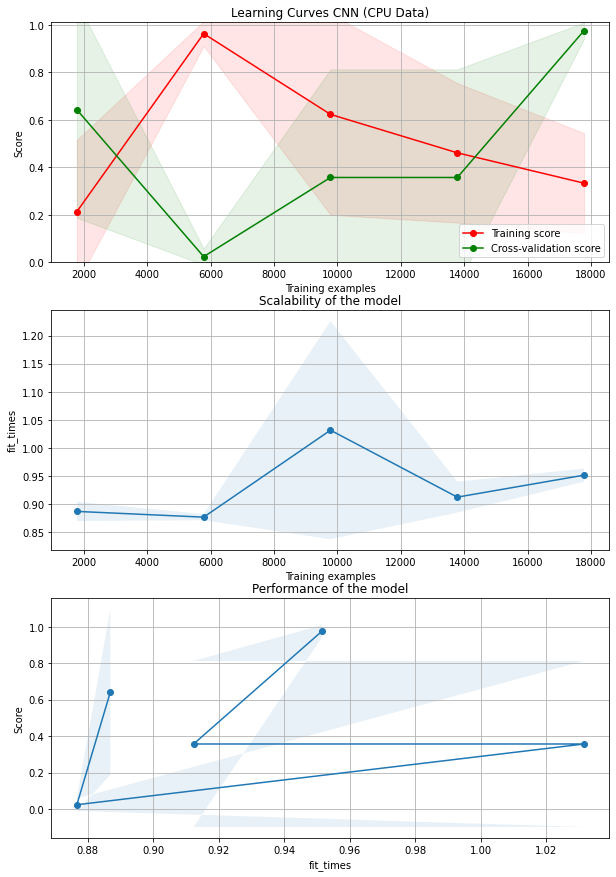

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    return plt

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves CNN (CPU Data)"
plot_learning_curve(model, title, normalized_X, Y, axes=axes[:], ylim=(0.0, 1.01),
                    cv=3, n_jobs=-1)

plt.show()


In [ ]:
# CONFUSION MATRIX

# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn import preprocessing
from keras.optimizers import Adam

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=9, kernel_initializer='he_uniform', activation='hard_sigmoid', kernel_constraint=maxnorm(2)))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid')) 
    # Compile model
    opt = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/sample_data/CPU_INFO.csv", delimiter=",")
print(dataset.shape)
# split into input (X) and output (Y) variables
X = dataset[:,0:9]
Y = dataset[:,9]

# normaliza input and output values
normalized_X = preprocessing.normalize(X)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(normalized_X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


(26680, 10)
Best: 0.976011 using {'neurons': 15}
0.642678 (0.455391) with: {'neurons': 1}
0.642678 (0.455391) with: {'neurons': 5}
0.642678 (0.455391) with: {'neurons': 10}
0.976011 (0.033925) with: {'neurons': 15}
0.023989 (0.033925) with: {'neurons': 20}
0.309344 (0.437479) with: {'neurons': 25}
0.642678 (0.455391) with: {'neurons': 30}


In [ ]:
y_pred = grid_result.best_estimator_.predict(normalized_X)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y, y_pred))

[[ 9534     0]
 [17146     0]]
